# This Analysis about Telco Customer Churn

### importing some important libarares

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### load the file 

In [2]:
dataFrame = pd.read_csv('telco_churn.csv')

### Take idea about data

In [92]:
print(dataFrame.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check

In [5]:
print(dataFrame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
print(dataFrame.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


# Cleaning Data Phase

### ensure if there is missiing values

In [4]:
print(dataFrame.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Drop Customer ID column because is not matter

In [7]:
dataFrame.drop(columns=['customerID'], inplace=True)

### Change Total Charges column values to numeric values to use it in analysis

In [10]:
dataFrame['TotalCharges'] = pd.to_numeric(dataFrame['TotalCharges'], errors='coerce')

### Check if there duplicated rows

In [15]:
dataFrame.duplicated().sum()


22

### Drop duplicates rows

In [18]:
dataFrame.drop_duplicates(inplace=True)

### Drop rows that have null values

In [12]:
dataFrame.dropna(inplace=True)

### Save the cleaned file 

In [13]:
dataFrame.to_csv('telc_churn_cleaned.csv',index=False)

# Second Phase

# EDA Phase

### load cleaned csv

In [96]:
dataFrame = pd.read_csv('telc_churn_cleaned.csv')

## Univariate

### Generate visulaization to numeric columns to see Distribution

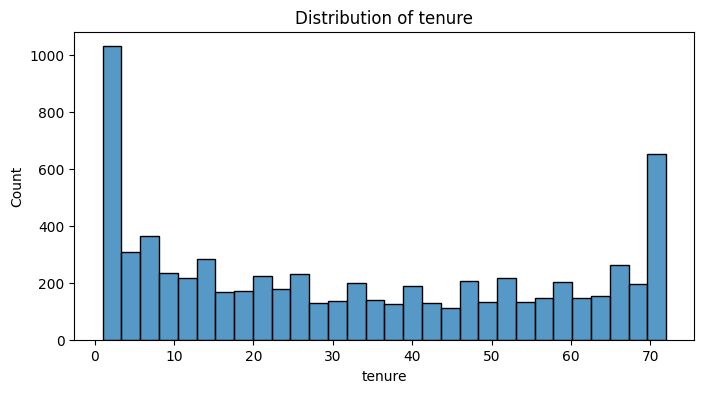

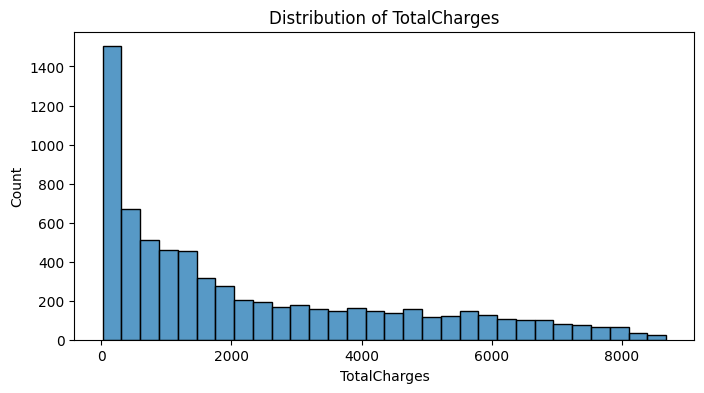

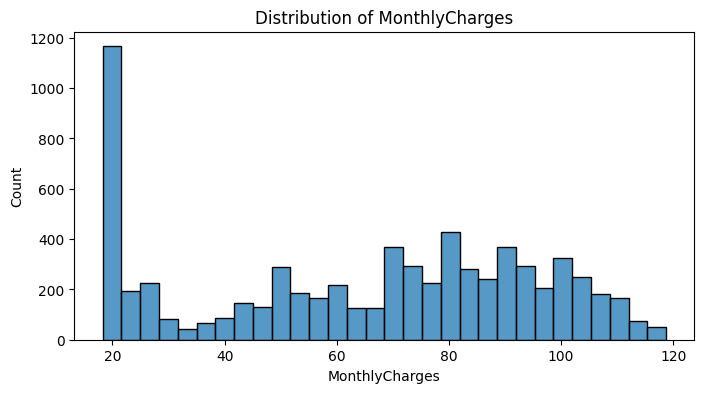

In [24]:
numerical_columns = ['tenure','TotalCharges','MonthlyCharges']
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(dataFrame[col], kde= False , bins = 30)
    plt.title(f'Distribution of {col}')
    plt.show()

### Notes :
#### in tenure plot ( histogram ) we see little tenure is i a lot
#### in Total charge  plot ( histogram ) we see little total charges  is more
#### in monthly charge  plot ( histogram ) we see high monthly charges  is more
#### there is relate between high monthly charges and little tenure

## Bivariate

### Generate visulaization to categorical columns to see counts

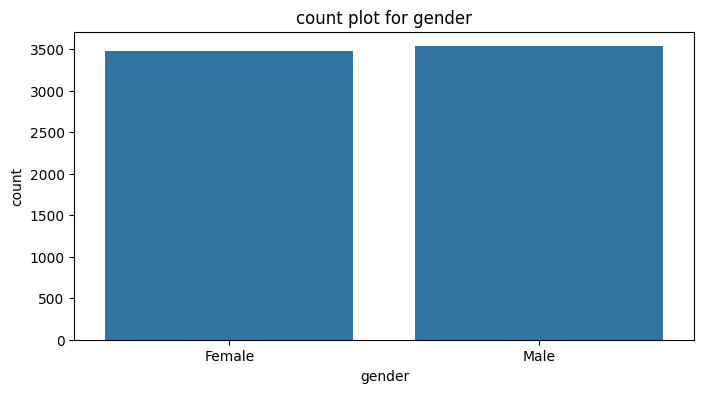

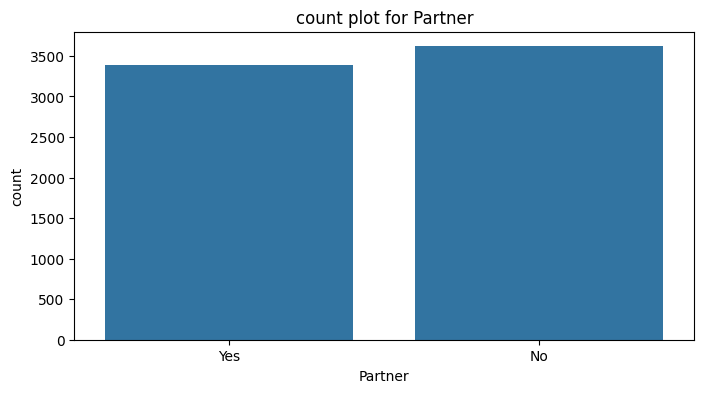

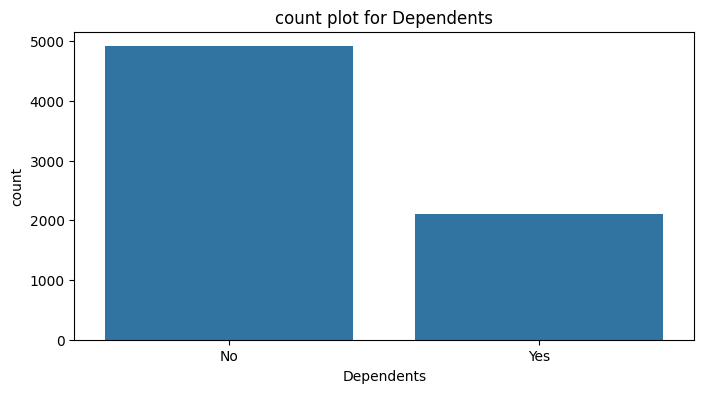

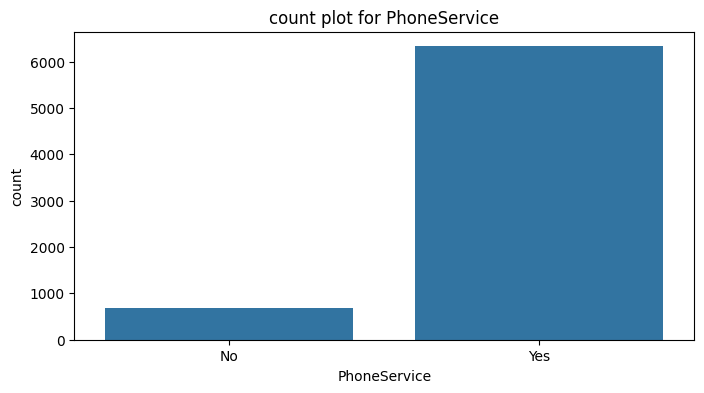

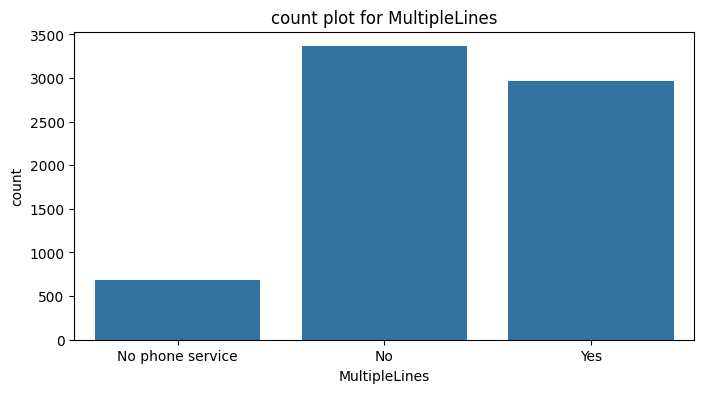

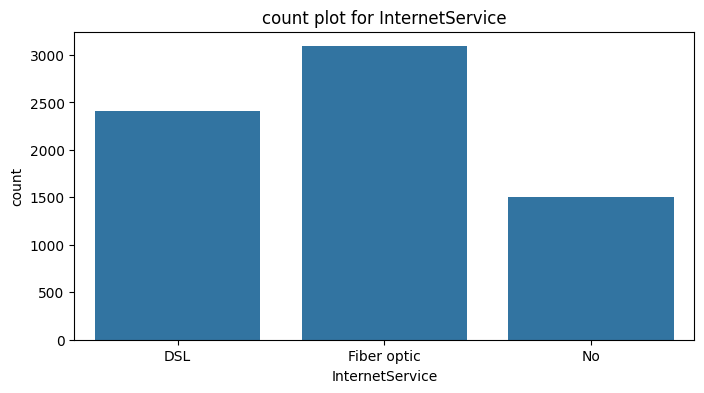

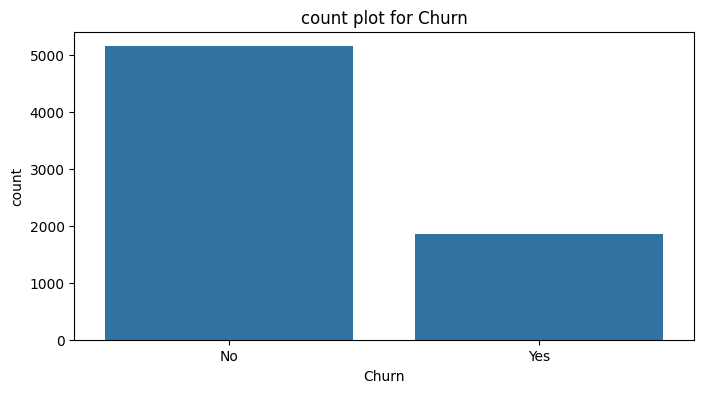

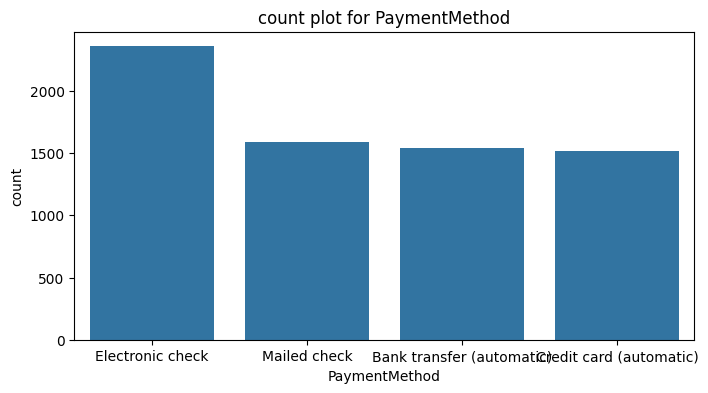

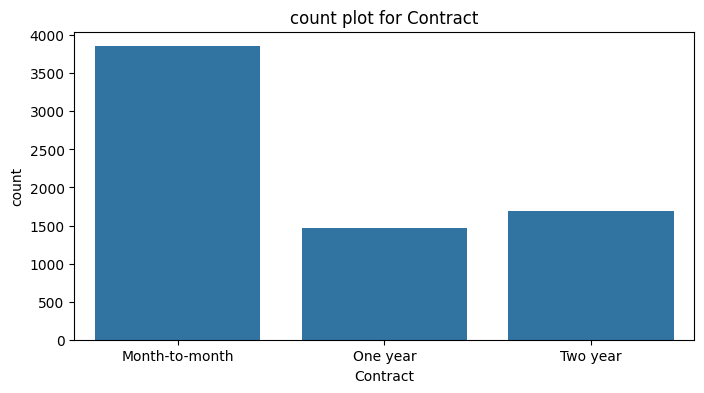

In [33]:
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'Churn', 
                       'PaymentMethod', 'Contract']
for col in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x=dataFrame[col])
    plt.title(f'count plot for {col}')
    plt.show()

### Notes :
#### in gender plot we see equlity in both
#### in Partner plot  we see the people that not partner is little bit more that partners
#### in Dependets plot  we see people have dependets little than who dont have dependets
#### in internet services plot  we see people that use fiber optic more than those use dls and dls more than those dont use any service
#### in contract plot we see people use month to month contrack more the one year contrackt

## Visualize Correlation

### Generate visulaization to relation ship between multi columns 

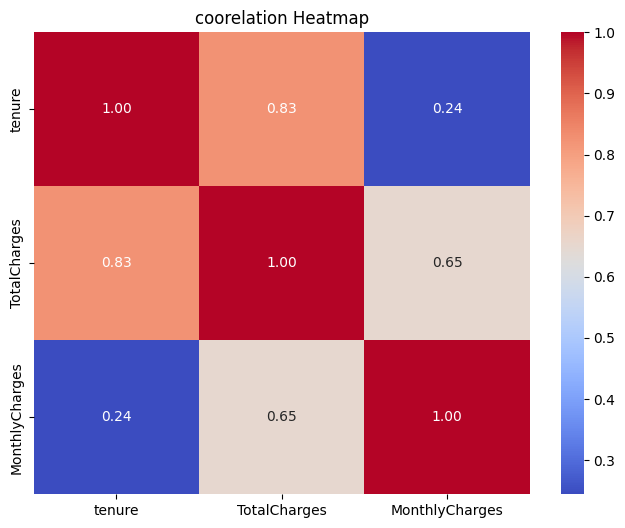

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(dataFrame[numerical_columns].corr(),annot=True,cmap= 'coolwarm',fmt='.2f')
plt.title('coorelation Heatmap')
plt.show()

### Notes :
#### you can see monthly charges and tenure little relation 

# More EDA

### Extract percentage of churn customers

In [95]:
churn_distribution = dataFrame['Churn'].value_counts()
print(f"Percentage of churn customers: {churn_distribution['Yes'] / len(dataFrame2) * 100:.2f}%")

Percentage of churn customers: 26.58%


### Generate plot that show us the tenure and churn related

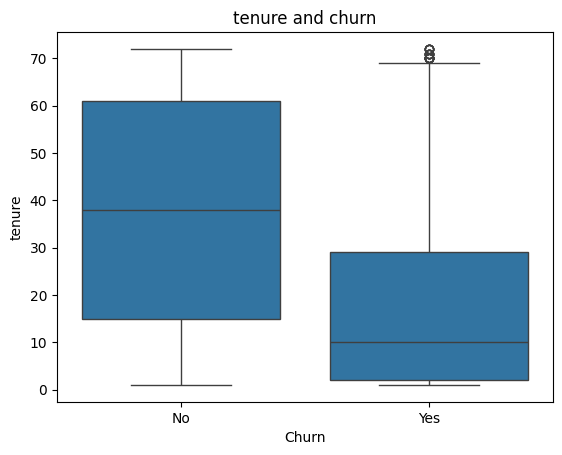

In [55]:
sns.boxplot(x='Churn', y='tenure' , data = dataFrame2)
plt.title('tenure and churn')
plt.show()

### Notes:
#### we see the more customers churn in little tenure

### Generate plot that show us the monthly chargeand churn related

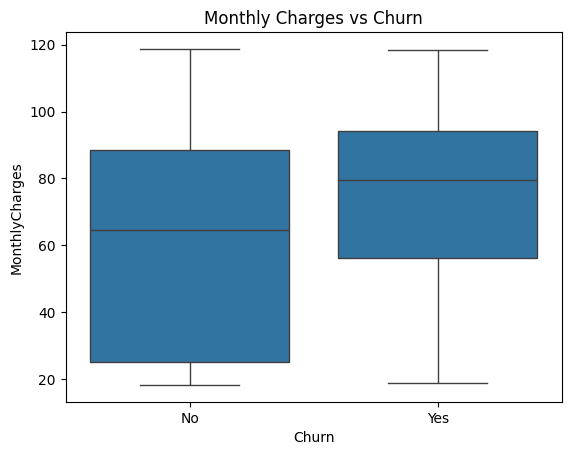

In [57]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=dataFrame2)
plt.title('Monthly Charges vs Churn')
plt.show()

### Notes:
#### we see the more customers churn in high monthly charge

### Generate plot that show us the contract and churn related

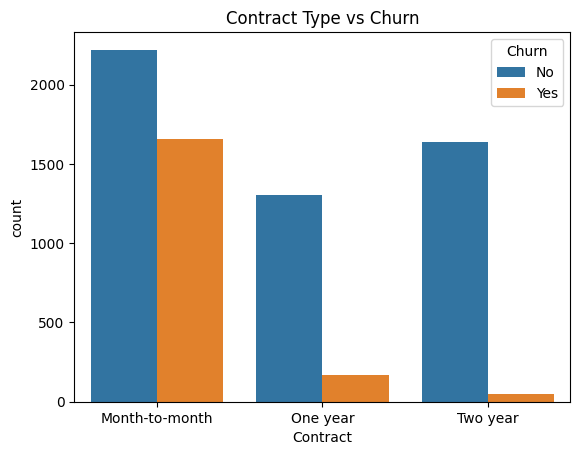

In [59]:
sns.countplot(x='Contract', hue='Churn', data=dataFrame2)
plt.title('Contract Type vs Churn')
plt.show()

### Notes:
#### we see the more customers churn in they uses month to mounnt contract

# improve insight

### Generate plot that show us the monthly charges and internet service tupe related

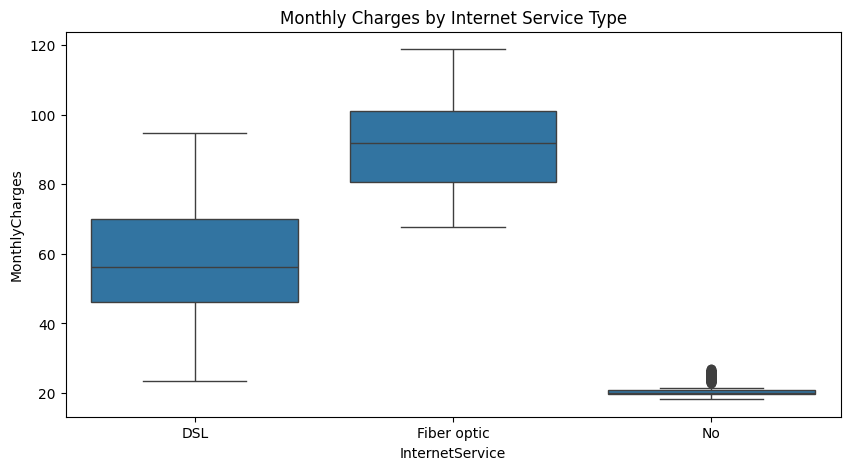

In [76]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataFrame["InternetService"], y=dataFrame["MonthlyCharges"])
plt.title("Monthly Charges by Internet Service Type")
plt.show()

### Notes:
#### we see the more higly monthly charge is about customers use fiber optic intenr service

### Generate plot that show us the high monthly charges and streaming tv 

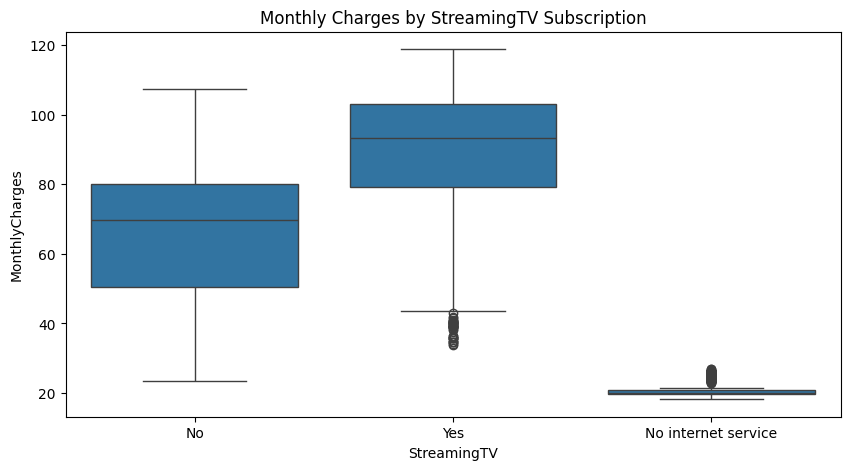

In [78]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataFrame["StreamingTV"], y=dataFrame["MonthlyCharges"])
plt.title("Monthly Charges by StreamingTV Subscription")
plt.show()

### Notes:
#### we see the more higly monthly charge is about customers subscribe to streaming tv

### Generate plot that show us churn and other categorical things

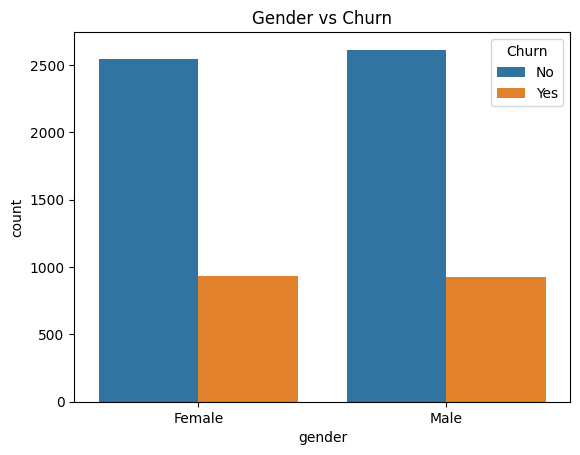

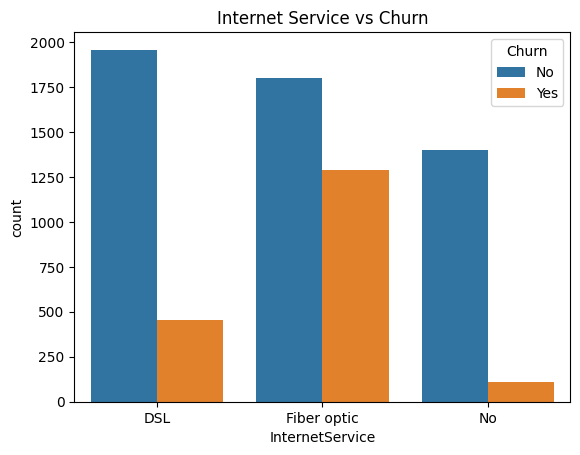

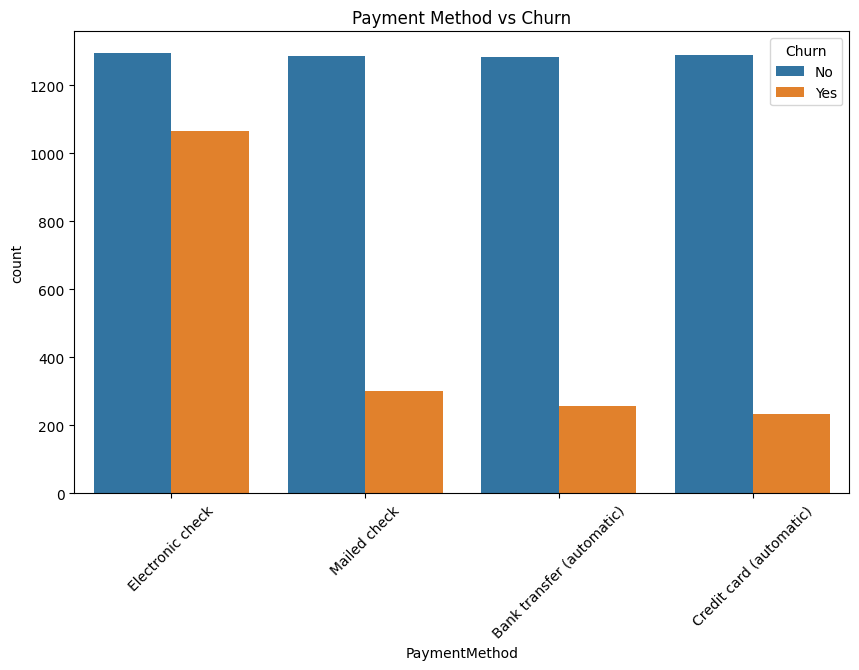

In [80]:
sns.countplot(x='gender', hue='Churn', data=dataFrame)
plt.title('Gender vs Churn')
plt.show()

# Internet Service vs Churn
sns.countplot(x='InternetService', hue='Churn', data=dataFrame)
plt.title('Internet Service vs Churn')
plt.show()

# Payment Method vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=dataFrame)
plt.title('Payment Method vs Churn')
plt.xticks(rotation=45)
plt.show()

### Notes:
#### we see the the churn customers gender is same between female and male
#### we see the the churn customers and intenet service that one uses fiber optic that more churn 
#### we see the the churn customers and payment methode that one pay by electonic check si more churn

### create new colomn that demonstreate the time of tenure that leave
### Generate plot that show us churn and tenure group

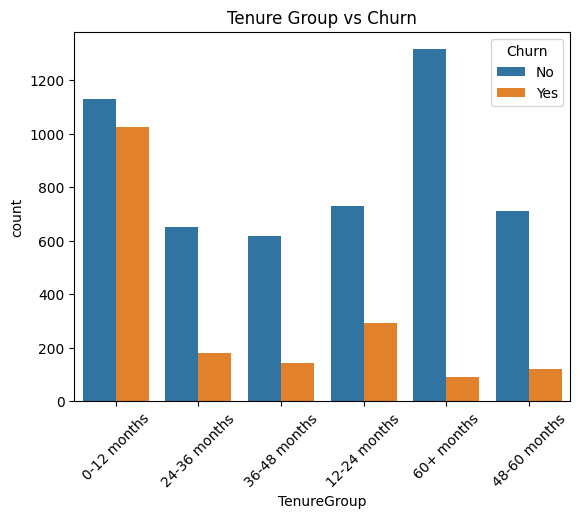

In [82]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 months'
    elif tenure <= 24:
        return '12-24 months'
    elif tenure <= 36:
        return '24-36 months'
    elif tenure <= 48:
        return '36-48 months'
    elif tenure <= 60:
        return '48-60 months'
    else:
        return '60+ months'

dataFrame['TenureGroup'] = dataFrame['tenure'].apply(tenure_group)

# Create Total Revenue Feature
dataFrame['TotalRevenue'] = dataFrame['MonthlyCharges'] * dataFrame['tenure']
sns.countplot(x='TenureGroup', hue='Churn', data=dataFrame)
plt.title('Tenure Group vs Churn')
plt.xticks(rotation=45)
plt.show()

### Notes:
#### we see customers between 0-12 months more churn

# insights and Notes

<h2>Churn rate</h2>
<h4> Approximately 26.5% of customers churned</h4>
<h2> tenure and churn</h2>
<h4> customers with first monuts 0-12 are more churn this mean firsts mounths is important</h4>
<h2>monthly charges and churn</h2>
<h4> customers that have high montly charges is more likely to churn this mean  there dissatisfaction about pricing </h4>
<h2 >internet service and churn </h2>
<h4> the customers that use fiber optic service is more likely to churn this mean two things srevice issues or high price</h4>

# this analysis tell us:

<h2>Focus on new customers</h2>
<h3>make strategies to customers in there first years</h3>
<h2></h2>
<h3></h3>
<h2></h2>
<h3></h3>